[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drdave-teaching/OPIM5509Files/blob/main/OPIM5509_Module2_Files/1_ForwardPropagation.ipynb)

# Forward Propagation
-----------------------------------------
**Dr. Dave Wanik**

In this notebook we will explore the concept of 'forward propagation' - how a neural network makes a prediction by passing information across the network by combining the input and a weight matrix via a dot product.

In [ ]:
# get some important modules
import pandas as pd # for data wrangling
import numpy as np # for array calculations, some math functions
from matplotlib import pyplot as plt #for plotting

In [ ]:
# some modules for neural nets
from keras.models import Sequential # for the sequential API
from keras.layers import Dense # stacking dense layers

# Read and Prepare Data

This is a basic dummy dataset we've created to predict how many people are playing 🏌 golf on any given day.

In [ ]:
# # https://docs.google.com/spreadsheets/d/1Zp_WlJpN7r1uPRxvJFTM1pXqjlaKIf8l/edit?usp=sharing&ouid=113264555687147168472&rtpof=true&sd=true
# !gdown 1Zp_WlJpN7r1uPRxvJFTM1pXqjlaKIf8l

Downloading...
From: https://drive.google.com/uc?id=1Zp_WlJpN7r1uPRxvJFTM1pXqjlaKIf8l
To: /content/dummy data.xlsx
100% 9.17k/9.17k [00:00<00:00, 23.7MB/s]


In [ ]:
# df = pd.read_excel('dummy data.xlsx')
# df

In [ ]:
# Link to the data file on Github
url = "https://raw.githubusercontent.com/drdave-teaching/OPIM5509Files/refs/heads/main/OPIM5509_Module2_Files/dummy%20data.xlsx"

In [ ]:
df = pd.read_excel(url)
df

,Day,Outlook,Temp,Humidity,Wind,Golf Players
0,1,Sunny,Hot,High,Weak,25
1,2,Sunny,Hot,High,Strong,30
2,3,Rain,Hot,High,Weak,46
3,4,Rain,Cool,High,Weak,45
4,5,Rain,Cool,Normal,Weak,52
5,6,Rain,Cool,Normal,Strong,23
6,7,Rain,Cool,Normal,Strong,43
7,8,Sunny,Hot,High,Weak,35
8,9,Sunny,Cool,Normal,Weak,38
9,10,Rain,Cool,Normal,Weak,46


## Explore the dataset
Look at the first few rows, check for missing values, scatterplot matrix. You could also look at the correlation among predictors.

In [ ]:
# look at the first few rows
df.head()

,Day,Outlook,Temp,Humidity,Wind,Golf Players
0,1,Sunny,Hot,High,Weak,25
1,2,Sunny,Hot,High,Strong,30
2,3,Rain,Hot,High,Weak,46
3,4,Rain,Cool,High,Weak,45
4,5,Rain,Cool,Normal,Weak,52


Summary statistics on the variables.

In [ ]:
df.describe()

,Day,Temp,Humidity,Wind,Players
count,14.0000,14.000000,14.000000,14.000000,14.000000
mean,7.5000,65.714286,70.571429,10.857143,39.785714
std,4.1833,13.825442,12.376866,8.198097,9.672949
min,1.0000,50.000000,54.000000,0.000000,23.000000
25%,4.2500,52.250000,61.750000,3.500000,31.250000
50%,7.5000,65.500000,68.500000,10.500000,43.500000
75%,10.7500,78.500000,80.000000,18.000000,46.000000
max,14.0000,89.000000,89.000000,23.000000,52.000000


Scatterplot matrix of all variables.

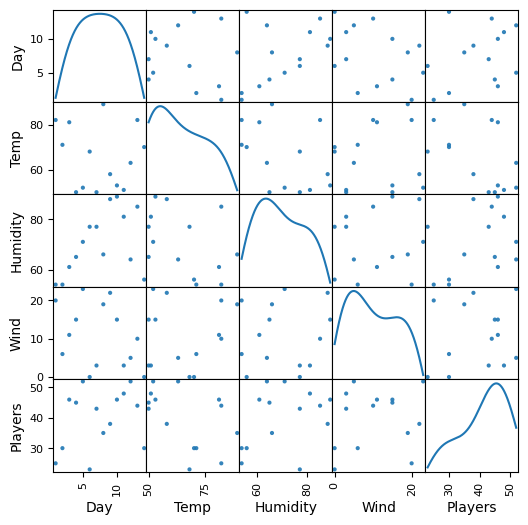

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.9, figsize = (6, 6), diagonal = 'kde')
plt.show()

We see some basic things like as the temperature goes up, the number of golfers goes down - as the wind goes up, then number of golfers goes down.

# Forward Propagation

Neural Networks are blackbox methods. Data goes in, answer comes out. To start, you are going to take one input datapoint and output one prediction. Since you have only one input datapoint and one output datapoint, you are going to build a neural network with a single weight mapping from the input point to the output. As you can see, with one weight, the network takes in one datapoint at a time and outputs a single prediction.


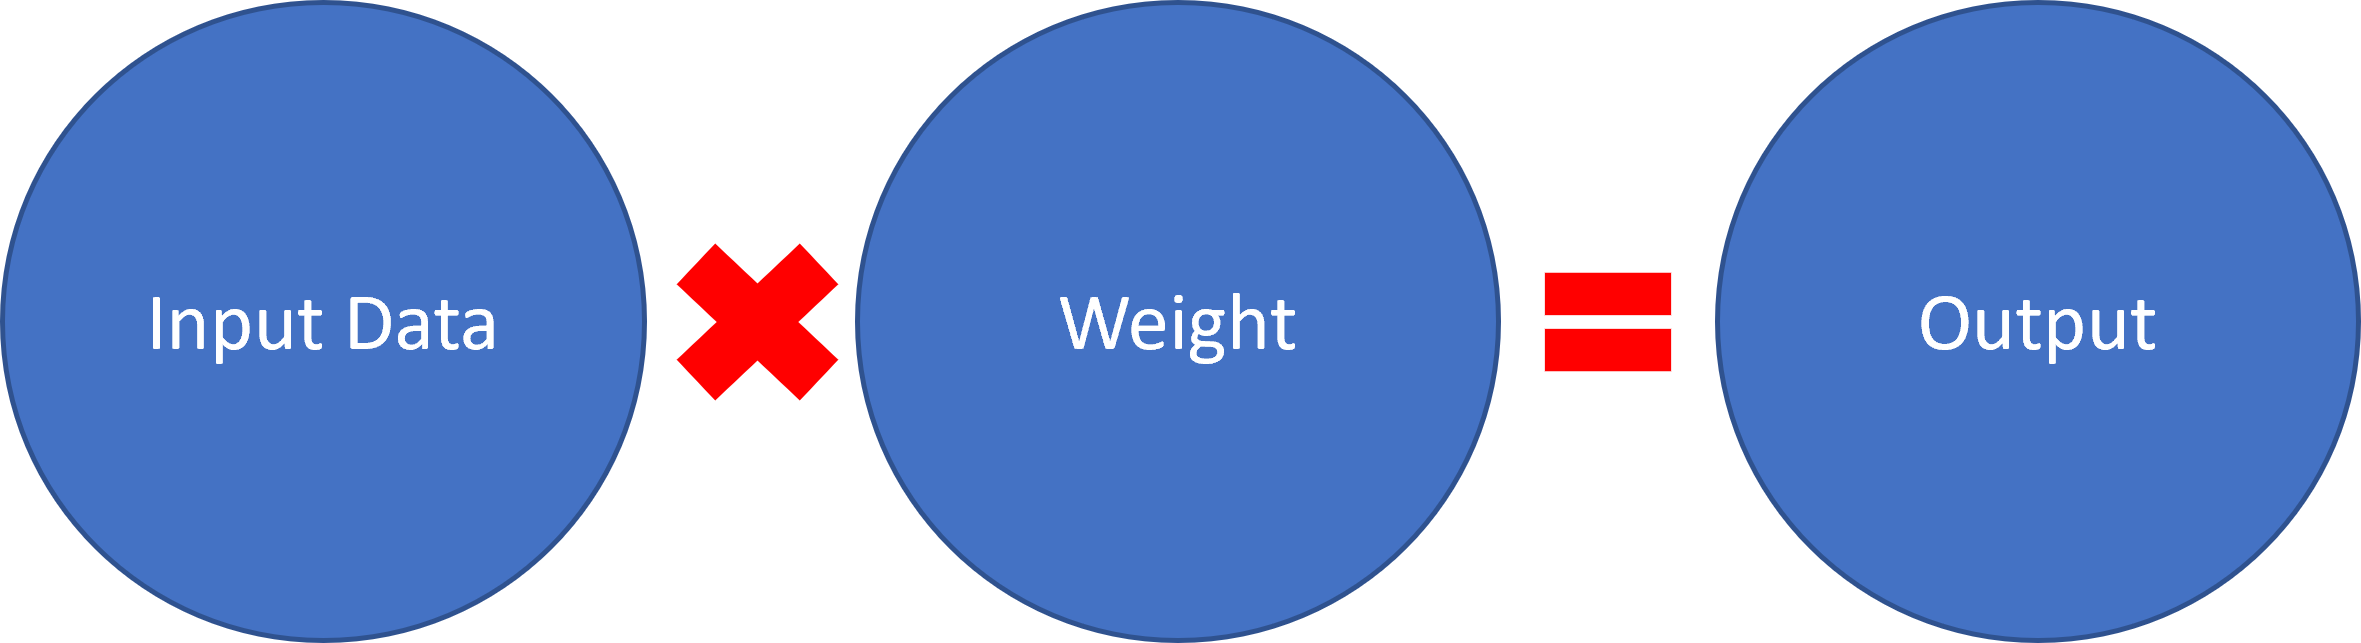

**Figure:** a VERY simple neural network - one input, one weight, one output. There is no hidden layer here - that comes later!

Here is some useful terminology:
*   **Input data**: It's a number that you recorded in the real world. For example: temperature, a baseball player's batting average or a stock price.
*   **Prediction**: A prediction is what the neural network tells you, given the input data, such as "given the temperature, it's 20% likely that people will wear a winter hat today" or "given a baseball player's batting average, we predict they will hit two home runs today" or "given yesterday's stock price, we predict today's stock price will be 101.52."
* **Making mistakes...**:  This prediction is not always right. Sometimes a neural network will make mistakes, but it can learn from them. If the prediction is too high, it will adjust its weight to predict lower next time, and vice-versa.
* **... Helps us update the weight**:  Trial and error help the network learn. It tries to make prediction first. Then, it sees whether the prediction was too high or too low. Finally, it changes the weight (up or down) to predict more accurately the next time it sees the same input.

Here is the general framework for how information flows across the network:
* Input (Information) ▶ Weight (Knowledge) ▶ Output (Prediction)

💡In a simple example (one input, one weight, one output), **the neural network effectively multiplies the input by weight. The weight "scales" the input by a certain amount.** If the weight was 2, then it would double our input. If the weight is 0.01, then it would divide the input by 100. As you can see, some weight values make the input bigger and other values make it smaller.

🛑 to start, we only have one input so we are doing simple multiplication. When we have multiple inputs, we will need a more clever way to combine information. Also note that **we haven't mentioned hidden layers yet**... just weights... hidden layers come a little later!

## Try a simple example

Let's just grab the first row's value for temperature (82) and multiply it times a weight(0.9) to generate our prediction.

👀 Yes, neural networks are really this simple (to start)!

In [ ]:
# here are the first few rows of the data
df.head()

,Day,Temp,Humidity,Wind,Players
0,1,82,54,20,25
1,2,71,54,6,30
2,3,81,61,11,46
3,4,50,65,15,45
4,5,52,71,23,52


In [ ]:
# 1. input data enters = temperature
# 2. multiply input by weight = input * 0.9
# 3. deposit the prediction = 73.8 (number of people playing golf)

# structure of the network:
weight = 0.9
def neural_network(input, weight):
    prediction = input * weight # multiply input by weight
    return prediction

# how to use the network to predict something:
temp = df['Temp'].tolist() # convert temperature to list
input = temp[0] # input data enters, the first temperature value
pred = neural_network(input,weight) # deposit the prediction
print(pred)

73.8


Check your work.

In [ ]:
# same answer as above!
# input*weight
82*0.9

73.8

💡Neural networks do not just predict positive numbers either, they can also predict negative numbers, and even take negative numbers as input. Perhaps you want to predict the "probability that people will wear coats today", if the temperature was -10 degrees Celsius, then a negative weight time a negative temperature would predict a high probability that people would wear coats today.

## Making a Prediction with Multiple Inputs
Let's kick it up a notch! When there is only one input and one weight, we just multiply the two values to make a prediction. However, in the real-world, we will often have many different input features (just like we do in the golf dataset - wind, rain, humidity, temperature.) So instead of multiplication, we will need a clever why to combine information from multiple inputs - we will need the **dot product (a weighted sum!)!** A dot product is simply elementise multiplication and summation.

It sounds scarier than it is... let's look at a few examples of vector$⋅$vector versus vector$⋅$maxtrix (note the 'dot operator' $⋅$)



In [ ]:
# let's grab the first row of data for temperature, humidity and wind
# you can scroll up to confirm that these are the values from
# the first row
first_row = list(df.loc[0,'Temp':'Wind'])
first_row # temperature, humidity, wind

[82, 54, 20]

In [ ]:
# here are some weights
weights = [0.2, 0.3, 0.4]
weights

[0.2, 0.3, 0.4]

But you don't want to just multiply the values together - you want to multiply each element and then sum! This is called a dot product and `numpy` makes it really easy to implement with the np.dot() function.

In [ ]:
# let's perform a dot product between two vectors!
np.dot(first_row, weights)

40.6

In [ ]:
# check your work - same answer!
82*0.2 + 54*0.3 + 20*0.4

40.6

You should think of a dot product as elementwise multiplication and summation. Just like you see below (with different numbers)!

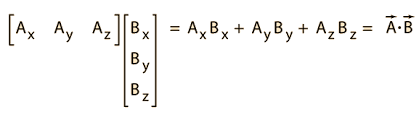

**Figure:** a dummy example of a dot product between two vectors of the same length.


💡 **Neural networks can combine intelligence from multiple datapoints.** The previous neural network was able to take one datapoint as input and make one prediction based on that datapoint. What if you could give the network more information at a time?

This allows the network to combine various forms of information to make better-informed decisions. But the fundamental mechanism for using weights hasn’t changed. You still take each input and run it through its own volume knob. In other words, you multiply each input by its own weight.

The new property here is that, because you have multiple inputs, you have to sum their respective predictions. Thus, you multiply each input by its respective weight and then sum all the local predictions together. This is called a weighted sum of the input, or a weighted sum for short. Some also refer to the weighted sum as a dot product.


🛑 lots of folks are loosely familiar with the concept of hidden layers, but please remember we haven't gotten to that part yet - right now, you have NO hidden layers. We'll get to that a little later.

### Complete Runnable Code

In [ ]:
# weighted sum of inputs:
def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

weights = [0.2, 0.3, 0.4] # pick the weights

# structure of the network:
def neural_network(input, weights):
    pred = w_sum(input,weights) # multiply inputs by weight
    return pred

# temp = hot or cool
# humidity = high or normal
# wind = weak or strong

temp = df['Temp'].tolist() # convert temperature to list
humidity = df['Humidity'].tolist() # convert humidity to list
wind = df['Wind'].tolist() # convert wind to list

input = [temp[0],humidity[0],wind[0]] # input data enters
pred = neural_network(input,weights) # deposit the prediction

print(pred)

40.6


### NumPy Code
Notice how we don't have to assert the lengths are the same - numpy takes care of a lot of the heavy lifting for us.

In [ ]:
import numpy as np
weights = np.array([0.2, 0.3, 0.4]) # pick the weights

# structure of the network:
def neural_network(input, weights):
    pred = input.dot(weights)
    return pred

temp = np.array(temp) # create array for temperature
humidity = np.array(humidity) # create array for humidity
wind = np.array(wind) # create array for wind

input = np.array([temp[0],humidity[0],wind[0]]) # input data enters
pred = neural_network(input,weights) # deposit the prediction

print(pred)

40.6


These codes are just 'nice to haves' - keras will do all of this for us later on!

#Some Background on Vectors, Matrices and Dot Products

Vectors are everywhere! They are just a list of numbers. They contain one row and X columns.

A matrix is simply a collection of vectors. It can be >1 rows and >= 1 columns.

Vectors are incredibly useful whenever you want to perform operations involving groups of numbers. In this case, we are performing a weighted sum between two vectors (dot product). We are taking two vectors of equal length (input and weights), multiplying each number based on its position (the first position in input is multiplied by the first position in weights, etc.), and then summing the resulting output.

## Weighted Sums (Dot Product)

The intuition behind how and why a dot product (weighted sum) works is easily one of the most important parts of truly understanding how neural networks make predictions. Loosely stated, **a dot product gives us a notion of similarity between two vectors.**

Look at the examples below. The highest weighted sum ($\text{w_sum(c,c)}$) is between vectors that are exactly identical. In contrast, since $a$ and $b$ have no overlapping weight, their dot product is zero. Perhaps the most interesting weighted sum is between $c$ and $e$, since $e$ has a negative weight. This negative weight cancelled out the positive similarity between them. However, a dot product between $e$ and itself would yield the number 2, despite the negative weight (the double negative turns positive).

### Examples of dot products (between two vectors)

In [ ]:
a = [ 0, 1, 0, 1]
b = [ 1, 0, 1, 0]
c = [ 0, 1, 1, 0]
d = [.5, 0,.5, 0]
e = [ 0, 1,-1, 0]

In [ ]:
# note that we are using NUMPY to do the dot product for us - very efficient!
print('np.dot(a,b):', np.dot(a,b))
print('np.dot(b,c):', np.dot(b,c))
print('np.dot(b,d):', np.dot(b,d))
print('np.dot(c,c):', np.dot(c,c))
print('np.dot(d,d):', np.dot(d,d))
print('np.dot(c,e):', np.dot(c,e))

np.dot(a,b): 0
np.dot(b,c): 1
np.dot(b,d): 1.0
np.dot(c,c): 2
np.dot(d,d): 0.5
np.dot(c,e): 0


**On Your Own:** You should try to work these numbers out by hand and see if you can get the same answer!

### Examples of dot product (between vector and matrix)
You need to practice this example! It is going to come up all the time.

Very soon, we will use the dot product of the input layer (first row of data in a .csv file) and a weight matrix to create the 'hidden layer'. The hidden layer is a nonlinear representation of information from the input and the weights!

### A first vector.matrix example

In [ ]:
input = [82, 54, 20] # a vector with 1 row x 3 column vector

ih_weights = [[ 1, 0, 1, 0, 5], # a matrix 3 row x 5 column vector
              [ 0, 1, 1, 0, -3],
              [.5, 0,.5, 0, 0.1]]


In [ ]:
np.dot(input,ih_weights) #...gives a 1 row by 5 column vector!

array([ 92.,  54., 146.,   0., 250.])

But if $\text{input}$ had 5 columns instead of 4, and $\text{ih_weights}$ was the same, you would get an error because it's invalid! How do you remember this? Dr. Dave's very own 'golden rule of dot products'.

**On Your Own (again!):** You should try to work these numbers out by hand and see if you can get the same answer! You are generalizing the dummy example of a dot product between two vectors to a vector DOT a matrix. You are welcome to change the numbers for practice (recommended).

In [ ]:
# try to make the math work!

# here's a hint
82*1 + 54*0 + 20*0.5

92.0

### A second vector.matrix example

In [ ]:
hidden_state = [ 92,54,146,0, 250] # a vector with 1 row x 5 columns

hp_weights = [[ 1], # a matrix 5 rows with 1 column
              [ 0],
              [-1],
              [ 0],
              [ 1]]

In [ ]:
np.dot(hidden_state,hp_weights) #...gives a 1 row by 5 column vector!

array([196])

You may not have realized it... but you just ran a simple version of forward propagation for a neural network! You predicted 196 people played golf ;)

### 'Golden Rule' of dot products

This is my own term 😉 what it will help you do is master the output shape of the dot product between i) two vectors or ii) vector and a matrix. This will help keep you organized when you do backpropagation calculations by hand.



> The requirement for matrix multiplication is that the number of columns of the first matrix must be equal to the number of rows of the second matrix.



Or, more concisely, if you have two quantities $A$ and $B$, the columns of $A$ must be equal to the rows of $B$, and the output shape of this product is the rows of $A$ and the columns of $B$.

**Dave's golden rule:** More concisely, when taking the dot product of two vectors (matrices), remember that the 'middles' need to match. When you cancel out the middles, you are left with the subsequent output shape. Let's try a few examples [rows, columns].


* [**1**,4] DOT [4,**5**] yields a [**1,5**] output shape
* [**1**,10] DOT [10,**7**] yields a [**1,7**] output shape
* [**1**,113] DOT [113,**50**] yields a [**1,50**] output shape

and lastly...
* [**1**,4] DOT [4,**1**] yields a [**1,1**] output shape

💡 Students can come back to this later after reviewing 'Predictions on Predictions'. The first three examples can be thought of has input times a weight matrix to yield a hidden layer. The fourth example can be thought of a hidden layer times a weight matrix to yield the final output (a [1,1] shape - which is a great shape for the output of a neural network when you are predicting a single quantity like the number of people who are playing golf!)



Here are some nice examples for you to check out on your own:
* https://towardsdatascience.com/linear-algebra-basics-dot-product-and-matrix-multiplication-2a7624942810

# Predicting on Predictions (Hidden Layers)

The inclusion of many weight matrices will yield 'hidden layers' - intermediate calculations that are used as inputs into other layers. When you specify one hidden layer in your neural network, you actually have TWO weight matrices.
* one weight matrix between **i**nput and the **h**idden layer (`ih_weights`)
* one weight matrix between the **h**idden layer and the **p**rediction (output) layer (`hp_weights`)

A neural network with one hidden layer is what most will identify as a neural network - something like this:

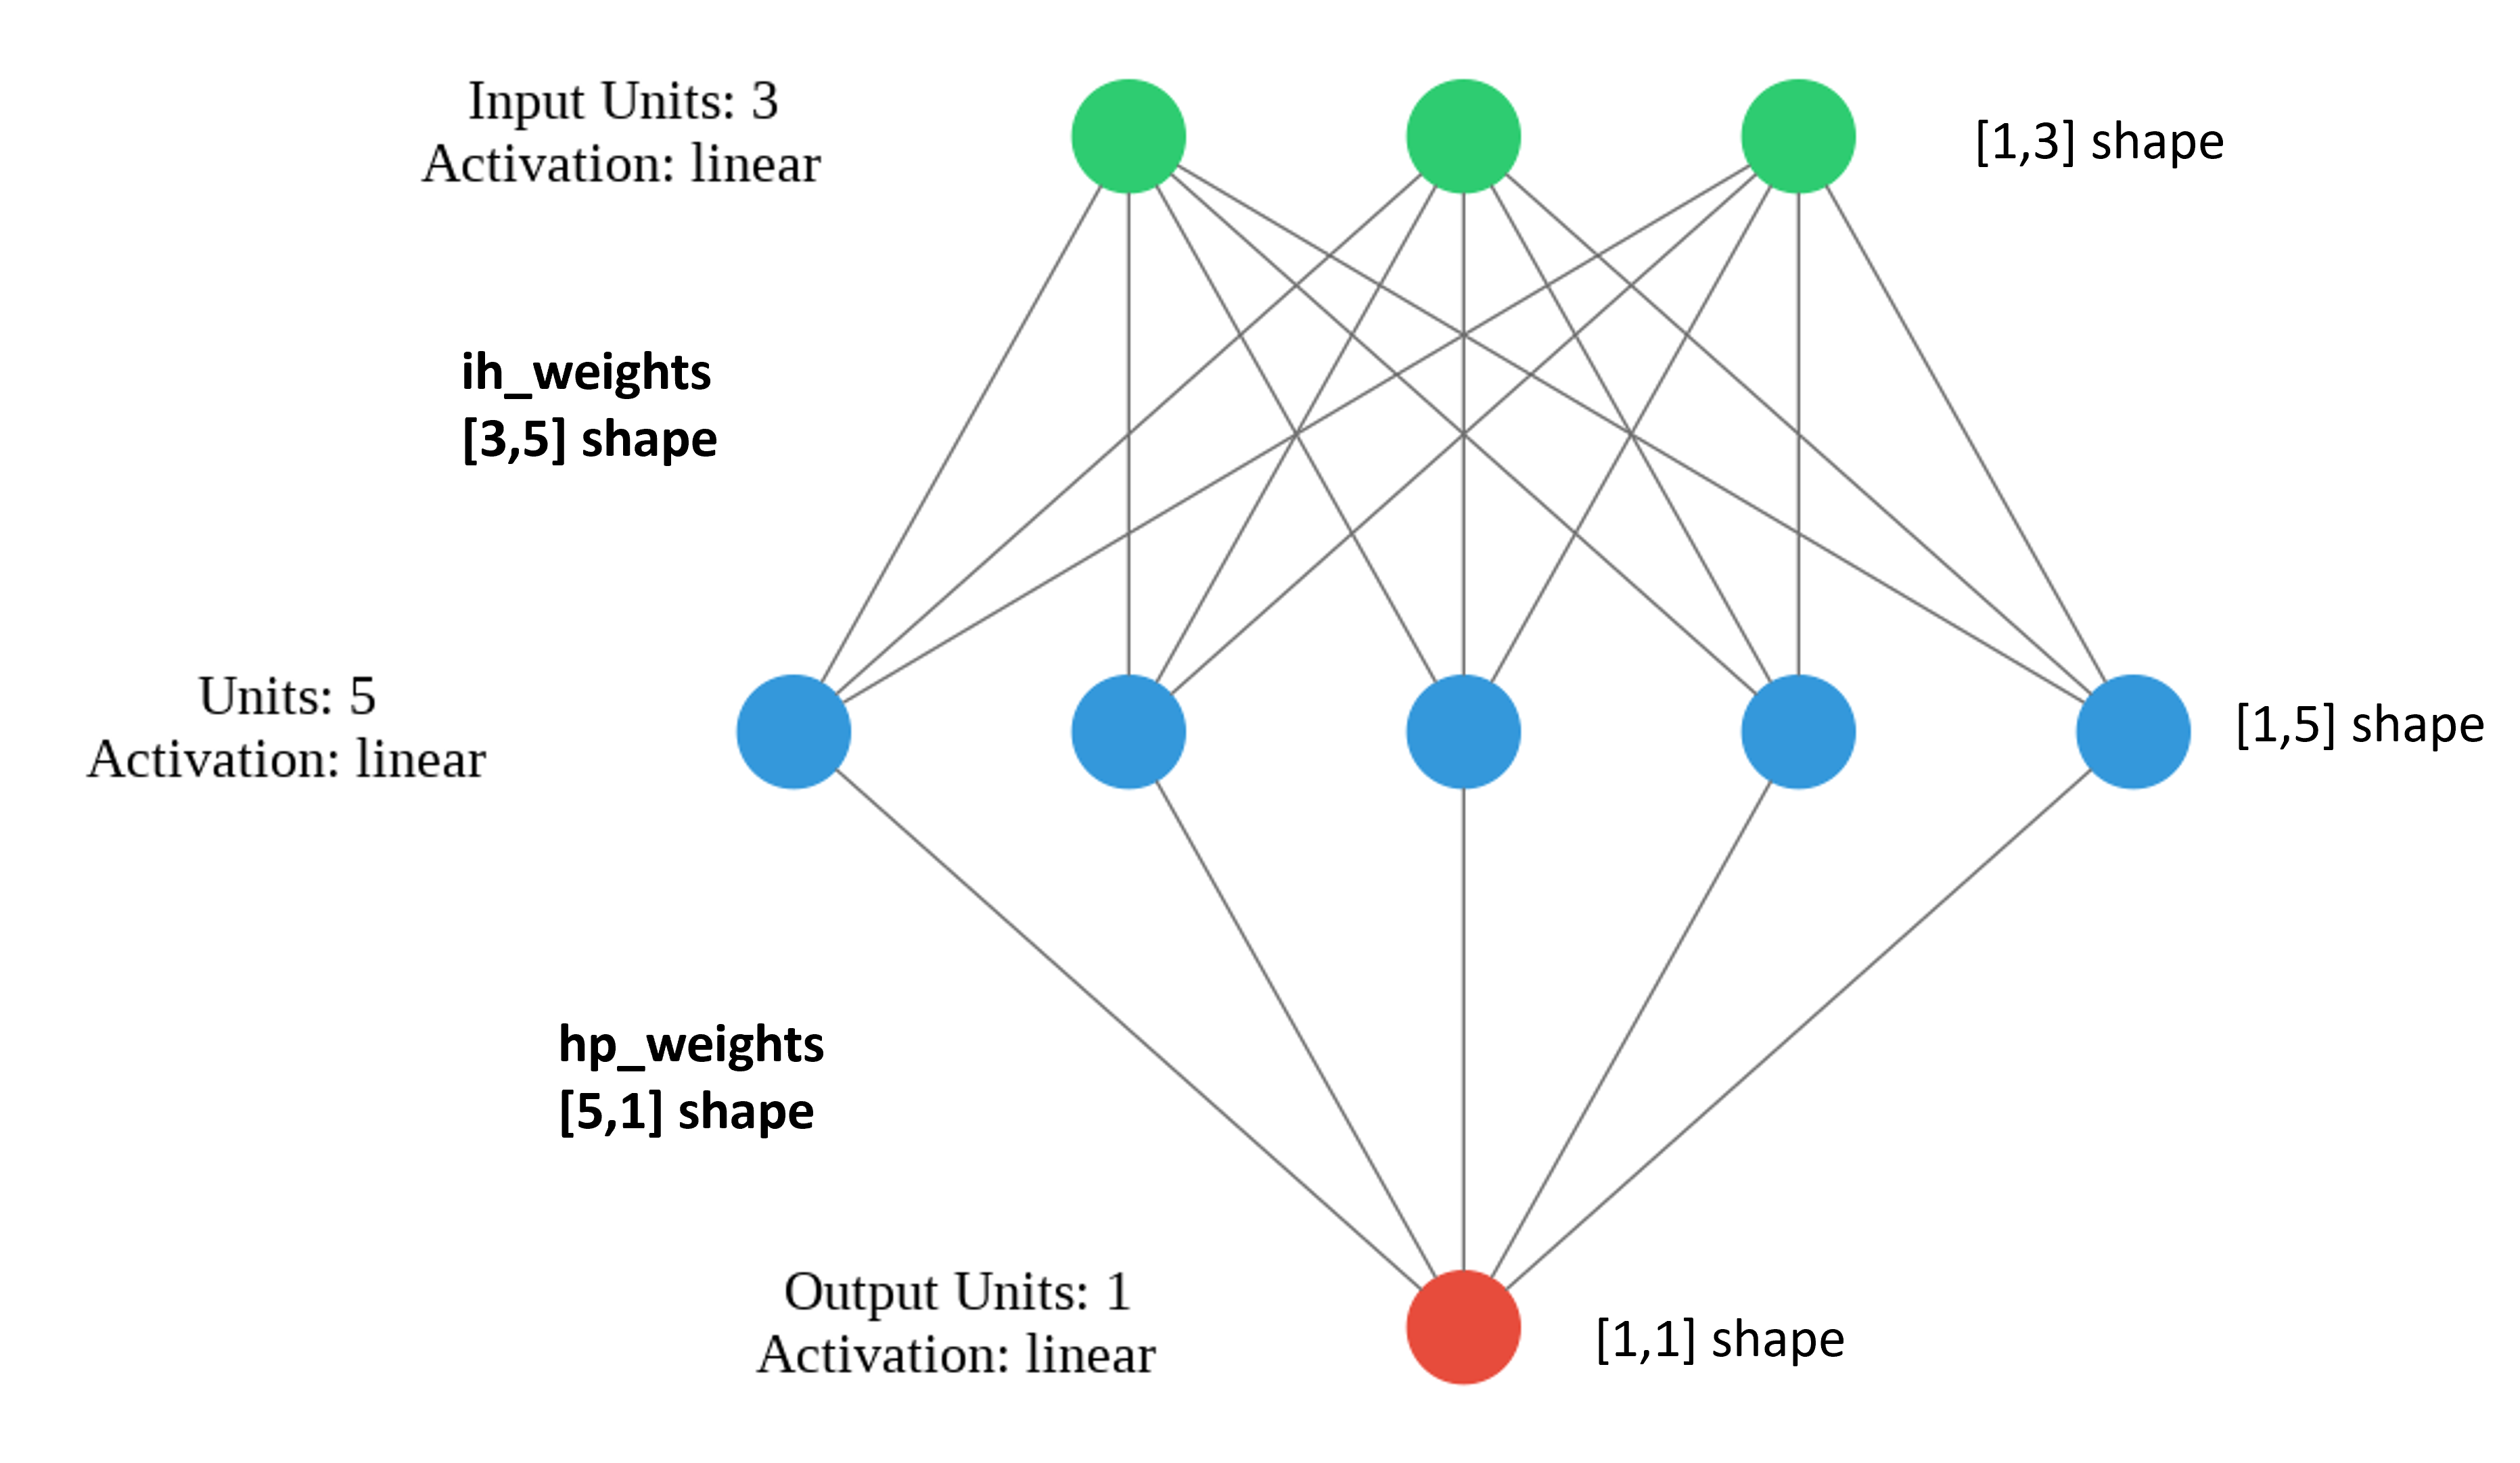

**Figure:** a simple neural network with one hidden layer (blue dots) - annotated with output shapes for clarity. Picture the [1,3] and [1,5] and [1,1] shapes are VECTORS. The weight matrices ih_weights [3,5] and hp_weights [5,1] should be thought of as MATRICES.

## Dot products!
How does information across the network get combined? With dot products! Weighted sums. Elementwise multiplication and summation. Neural networks combine information from the input layer and the weight matrices to make a final prediction.

This should make sense to you:
* The dot product of the green dots [1,2] with the first set of weights (ih_wgt, the black arrows) [2, 4] yields a [1,4] hidden layer (the blue dots!)
* The dot product of the blue dots [1,4] with the second set of weights (hp_wgt, the other black arrows) [4, 1] yields a [1,1] output (prediction) layer (the purple dot!)


### Plot a simple, nice looking neural networks with `keras-visualizer`

Try to analyze the Python code and see how the numbers correspond to the image.

In [ ]:
# reset the model names - you don't usually need to do this
from keras import backend as K
K.clear_session()

In [ ]:
!pip3 install keras-visualizer
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from keras_visualizer import visualizer
from keras import layers
model = models.Sequential()
model.add(Dense(5, input_shape=(3,))) # the 5 is for the number of hidden layers, the 3 is size of the input data
model.add(Dense(1))
model.summary() # inspect for output shapes and trainable parameters

#visualizer(model, format='png', view=True)
visualizer(model,  view=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26 (104.00 Byte)
Trainable params: 26 (104.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


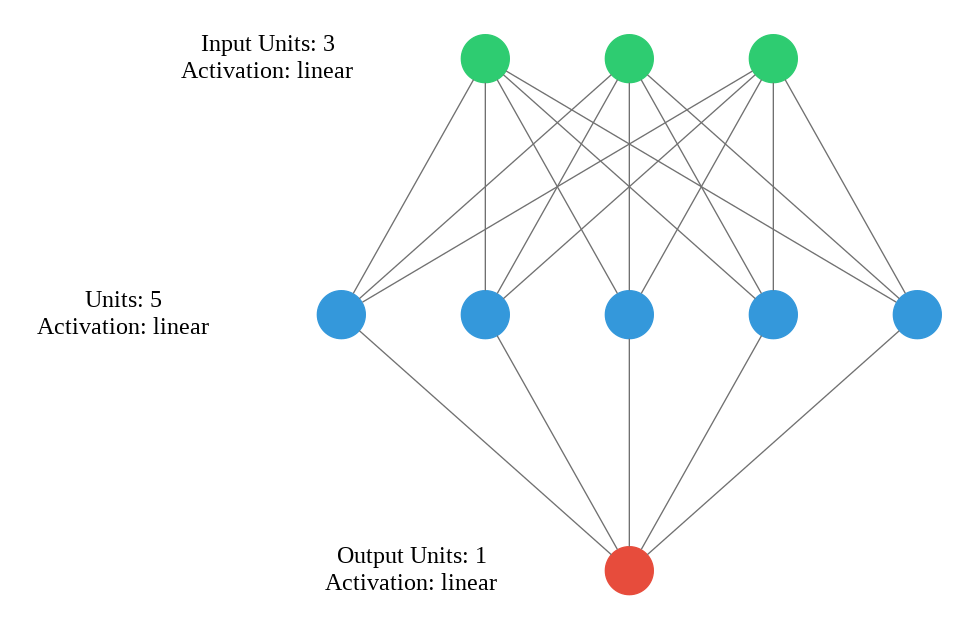

*Look left under the folder icon and you will find the visualization of this neural network! I've copied and pasted a version here for you.*

### Trainable Parameters and Output Shapes

In [ ]:
model.summary() # inspect for output shapes and trainable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26 (104.00 Byte)
Trainable params: 26 (104.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


26 trainable parameters... what does that mean?!

Try to note the relationship between output shapes and trainable parameters (weights and biases). Each blue layer has one 'bias' term for each unit in each hidden layer. Weights are best thought of as 'weight matrices'.

* From `input` to `dense`: 3 inputs [1,3] have to get transformed into a [1, 5] shape. The weight matrix has to be of a shape [3,5] (according to the 'golden rule' - the 'middles' cancel out!]. There are 3 × 5 = 15 weights, and there is a bias term for each hidden unit. 5 hidden units means 5 bias terms. 15 weights + 5 bias terms = 20 trainable parameters.
* From `dense` to `dense_1`: 5 inputs [1,5] have to get transformed into a [1, 1] shape. The weight matrix has to be of a shape [5,1] (according to the 'golden rule' - the 'middles' cancel out!]. There are 5 × 1 = 5 weights, and there is a bias term for each hidden unit. 1 hidden unit1 means 1 bias term. 5 weights + 1 bias term = 6 trainable parameters.  

If you sum all the weights and biases, you would get 26 trainable parameters!

## Stacking layers

Neural networks can be stacked. This 'stacking' is what the 'deep' in 'deep learning' is!

The output of one network (layer) can be fed as input to another network (layer). This results in two consecutive vector-matrix multiplications. It is common for some datasets contain patterns that are too complex for a single-weight matrix. These pattern will be discussed in other modules.

### Plot some more nice looking neural networks with `keras-visualizer`! All the layers!

In [ ]:
# reset the model names - you don't usually need to do this
from keras import backend as K
K.clear_session()

In [ ]:
!pip3 install keras-visualizer
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation
from keras_visualizer import visualizer
from keras import layers
model = models.Sequential()
model.add(Dense(10, input_shape=(3,), activation='relu')) # the 10 is for the number of hidden layers, the 3 is size of the input
model.add(Dense(5, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

#visualizer(model, format='png', view=True)
visualizer(model, view=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                40        
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 2)                 12        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


If you look at the printed model summary, you should be able to create the image below without notes!

And the opposite holds true - you should be able to look at the image and easily recreate the model summary.

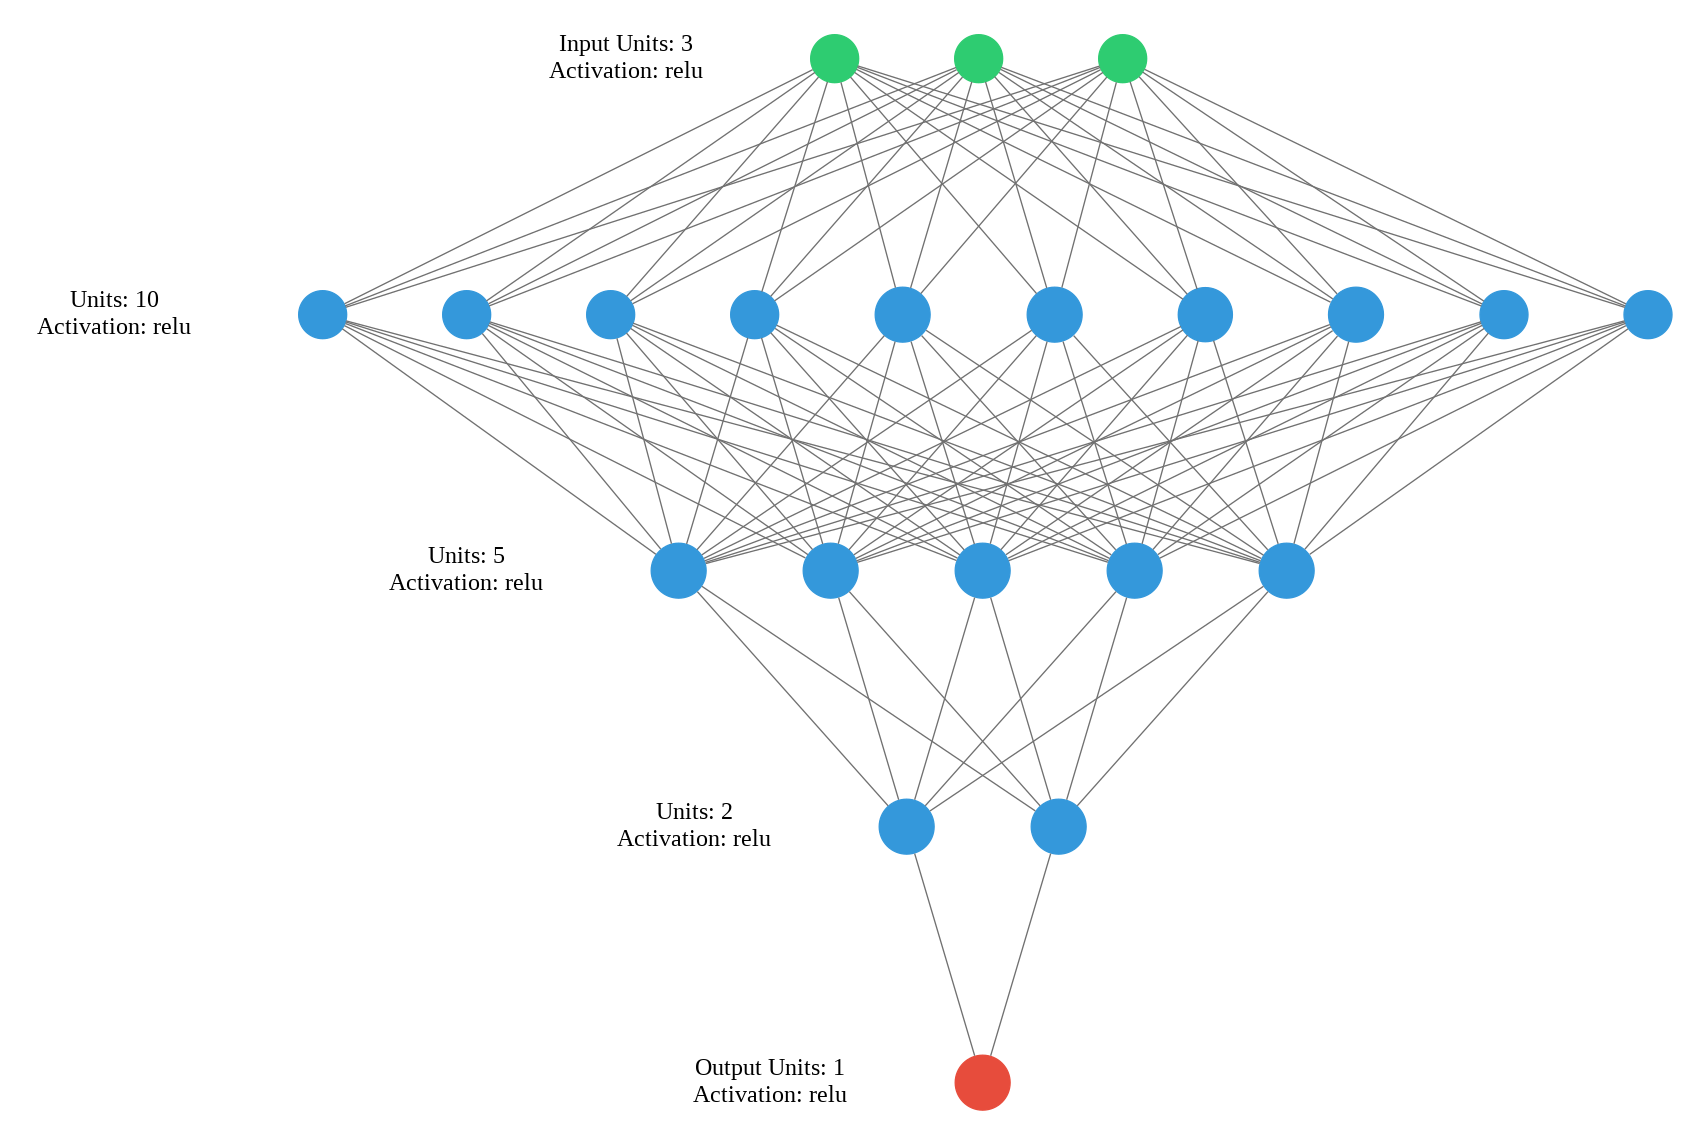

**Figure:** the three green dots are the input, the blue dots are the 'hidden units' within each hidden layer, and the red dot is the output. Everyone should be comfortable with a single output - but later on you will see that neural networks can have multiple outputs!

*Look left under the folder icon and you will find the visualization of this neural network! I've copied and pasted the embedded image here for you.*

### Trainable Parameters and Output Shapes

In [ ]:
model.summary() # inspect for output shapes and trainable parameters

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                40        
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 2)                 12        
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 110 (440.00 Byte)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You must be an expert at counting the number of trainable parameters! Try to note the relationship between output shapes and trainable parameters (weights and biases). Each blue layer has one 'bias' term for each unit in each hidden layer. Weights are best thought of as 'weight matrices'.

* From `input` to `dense`: 3 inputs [1,3] have to get transformed into a [1, 10] shape. The weight matrix has to be of a shape [3,10] (according to the 'golden rule' - the 'middles' cancel out!]. There are 3 × 10 = 30 weights, and there is a bias term for each hidden unit. 10 hidden units means 10 bias terms. 30 weights + 10 bias terms = 40 trainable parameters.
* From `dense` to `dense_1`: 10 inputs [1,10] have to get transformed into a [1, 5] shape. The weight matrix has to be of a shape [10,5] (according to the 'golden rule' - the 'middles' cancel out!]. There are 10 × 5 = 50 weights, and there is a bias term for each hidden unit. 5 hidden units means 5 bias terms. 50 weights + 5 bias terms = 55 trainable parameters.  
* From `dense_1` to `dense_2`: 5 inputs [1,5] have to get transformed into a [1, 2] shape. The weight matrix has to be of a shape [5,2] (according to the 'golden rule' - the 'middles' cancel out!]. There are 5 × 2 = 10 weights, and there is a bias term for each hidden unit. 2 hidden units means 2 bias terms. 10 weights + 2 bias terms = 12 trainable parameters.  
* From `dense_2` to `dense_3` (the output!): 2 inputs [1,2] have to get transformed into a [1, 1] shape. The weight matrix has to be of a shape [2,1] (according to the 'golden rule' - the 'middles' cancel out!]. There are 2 × 1 = 2 weights, and there is a bias term for each hidden unit in the output node. 1 hidden unit1 means 1 bias term. 2 weights + 1 bias terms = 3 trainable parameters.

If you sum all of these weights and biases, you will yield 110 trainable parameters!

# Summary
Neural networks perform repeated weighted sums of the input for prediction. You have seen this hold true for multiple architectures.

Everything we have done in this notebook is all about **Forward Propagation**, wherein a neural network takes input data and makes a prediction. We are propagating activations forward through the network.

## [optional] A Quick Primer on NumPy

In [ ]:
import numpy as np

a = np.array([0,1,2,3]) # a vector
b = np.array([4,5,6,7]) # another vector
c = np.array([[0,1,2,3], # a matrix
              [4,5,6,7]])

d = np.zeros((2,4)) # (2x4 matrix of zeros)
e = np.random.rand(2,5) # random 2x5
# matrix with all numbers between 0 and 1

print(a)
print(b)
print(c)
print(d)
print(e)

[0 1 2 3]
[4 5 6 7]
[[0 1 2 3]
 [4 5 6 7]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.24298504 0.98118304 0.9991443  0.97348786 0.71374946]
 [0.00196284 0.25812919 0.67936703 0.2875682  0.62821457]]


In [ ]:
print(a * 0.1) # multiplies every number in vector "a" by 0.1

print(c * 0.2) # multiplies every number in matrix "c" by 0.2

print(a * b) # multiplies elementwise between a and b (columns paired up)

print(a * b * 0.2) # elementwise multiplication then multiplied by 0.2

print(a * c) # since c has the same number of columns as a, this performs
# elementwise multiplication on every row of the matrix "c"

# print(a * e) # since a and e don't have the same number of columns, this
# # throws a "Value Error: operands could not be broadcast together with.."

[0.  0.1 0.2 0.3]
[[0.  0.2 0.4 0.6]
 [0.8 1.  1.2 1.4]]
[ 0  5 12 21]
[0.  1.  2.4 4.2]
[[ 0  1  4  9]
 [ 0  5 12 21]]


In [ ]:
a = np.zeros((1,4)) # vector of length 4
b = np.zeros((4,3)) # matrix with 4 rows & 3 columns

c = a.dot(b)
print(c.shape)

(1, 3)


In [ ]:
a = np.zeros((2,4)) # matrix with 2 rows and 4 columns
b = np.zeros((4,3)) # matrix with 4 rows & 3 columns

c = a.dot(b)
print(c.shape) # outputs (2,3)

e = np.zeros((2,1)) # matrix with 2 rows and 1 columns
f = np.zeros((1,3)) # matrix with 1 row & 3 columns

g = e.dot(f)
print(g.shape) # outputs (2,3)

h = np.zeros((5,4)).T # matrix with 4 rows and 5 columns
i = np.zeros((5,6)) # matrix with 6 rows & 5 columns

j = h.dot(i)
print(j.shape) # outputs (4,6)

# h = np.zeros((5,4)) # matrix with 5 rows and 4 columns
# i = np.zeros((5,6)) # matrix with 5 rows & 6 columns
# j = h.dot(i)
# print(j.shape) # throws an error

(2, 3)
(2, 3)
(4, 6)


## [optional] Making a Prediction with One Input and Multiple Outputs

Neural networks can also make multiple predictions using only a single input. Unlike neural networks with multiple inputs and a single output, where the prediction is undeniably connected, this network truly behaves as three independent components, each receiving the same input data. This makes the network simple to implement.

💡 **The most important comment in this setting is to notice that the three predictions are completely separate because they have different weights. Try to draw the network to confirm your understanding.**


In [ ]:
# Instead of predicting just
# whether the team won or lost,
# now we're also predicting whether
# they are happy/sad AND the percentage
# of the team that is hurt. We are
# making this prediction using only
# the current win/loss record.

def ele_mul(number,vector):
    output = [0,0,0]
    assert(len(output) == len(vector))
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output

weights = [0.9, 0.2, 0.6]

def neural_network(input, weights):
    pred = ele_mul(input,weights)
    return pred

temp = df['Temp'].tolist() # convert temperature to list
input = temp[0]
pred = neural_network(input,weights)

print(pred)

[73.8, 16.400000000000002, 49.199999999999996]


## [optional] Predicting with Multiple Inputs & Outputs

After building networks with multiple inputs and outputs, both networks can be combined to build a network that has both multiple inputs and multiple outputs. A weight connects each input node to each output node, and prediction occurs in the usual way.

Think about this neural network as three independent dot products: three independent weighted sums of the inputs. Each output node takes its own weighted sum of the input and makes a prediction.

💡 **Again, try to draw the network to confirm your understanding. Each output node has separate weights. It performs three independent weighted sums of the input to make three predictions.**

In [ ]:
            #temp #humidity #wind
weights = [ [0.1, 0.1, -0.3], # hot or cool?
            [0.1, 0.2, 0.0], # high or normal?
            [0.0, 1.3, 0.1] ] # weak or strong?

def w_sum(a,b):
    assert(len(a) == len(b))
    output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

def vect_mat_mul(vect,matrix):
    assert(len(vect) == len(matrix))
    output = [0,0,0]
    for i in range(len(vect)):
        output[i] = w_sum(vect,matrix[i])
    return output

def neural_network(input, weights):
    pred = vect_mat_mul(input,weights)
    return pred

# temp = temperature of the day
# humidity = humidity of the day
# wind = wind speed of the day

temp = df['Temp'].tolist() # convert temperature to list
humidity = df['Humidity'].tolist() # convert humidity to list
wind = df['Wind'].tolist() # convert wind to list

input = [temp[0],humidity[0],wind[0]] # input data enters
pred = neural_network(input,weights) # deposit the prediction

print(pred)

[7.600000000000001, 19.0, 72.2]


### NumPy Version

In [ ]:
import numpy as np

#toes %win #fans
ih_wgt = np.array([
            [0.1, 0.2, -0.1], #hid[0]
            [-0.1,0.1, 0.9], #hid[1]
            [0.1, 0.4, 0.1]  #hid[2]
            ]).T


# hid[0] hid[1] hid[2]
hp_wgt = np.array([
            [0.3, 1.1, -0.3], # hot or cool?
            [0.1, 0.2, 0.0], # high or normal?
            [0.0, 1.3, 0.1] ]).T # weak or strong?

weights = [ih_wgt, hp_wgt]

def neural_network(input, weights):

    hid = input.dot(weights[0])
    pred = hid.dot(weights[1])
    return pred

temp = np.array(temp) # create array for temperature
humidity = np.array(humidity) # create array for humidity
wind = np.array(wind) # create array for wind

input = np.array([temp[0],humidity[0],wind[0]]) # input data enters

pred = neural_network(input,weights) # deposit the prediction
print(pred)

[12.28  4.74 22.94]
